# Final Project Submission

* Student name: Skye Jeanat
* Student pace: Full Time
* Scheduled project review date/time: 10/28/22 5:00PM
* Instructor name: Joseph Mata


# Overview and Business Understanding

This proposal seeks to provide the stakeholder, a young-adult couple, with recommended zip codes to purchase their next vacation home. The below notebook will utilize several linear regression models. Each model will take steps to minimize error and analyze which variables from the provided data set most influence a home’s price. The data utilized encompasses home sales between 2014 and 2015 in King County, Washington.

The stakeholder would like their next home to be within their budget of $1 million, have no more than 4 bedrooms, and would like their home to be a waterfront property with a nice view. 
With the use of linear regression modeling, we will ultimately provide a recommendation on the locations within King County the stakeholder should most focus on when purchasing this vacation home. As later mentioned in the notebook, based on the stakeholder’s criteria, the homes the stakeholder will be considering will be 	relatively older in terms of age (1950s – 1980s build). Ultimately, it will be important for the stakeholder to target homes below their budget as they will likely need to invest in home improvement projects.


## Import Necessary Libraries

In [91]:
#Basic Imports
import pandas as pd
import numpy as np

#Data Visualizations
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import Image

#Statsmodels OLS
from statsmodels.formula.api import ols
import statsmodels.api as sm

#Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## View the Broader Data Set and Review Info

In [92]:
#Import the data set
raw_house_data = pd.read_csv('data/kc_house_data.csv')
raw_house_data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [93]:
#Use the .info() function to view the data types of each column
raw_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Convert Any Columns From Strings to Integers or Floats

### Convert Date from String to Date Month and Date Year

In [94]:
#Create a new variable utilizing the raw data before making adjustments
housing_data = raw_house_data

#Split the date column based on the '/'
housing_sale_dates = housing_data['date'].str.split("/",expand=True)

#Create a new data separating sales day/month/year
housing_sale_dates = housing_sale_dates.rename(columns={0:'sale_date_day'})
housing_sale_dates = housing_sale_dates.rename(columns={1:'sale_date_month'})
housing_sale_dates = housing_sale_dates.rename(columns={2:'sale_date_year'})

housing_data['sale_date_month'] = housing_sale_dates['sale_date_month'].astype('int')
housing_data['sale_date_year'] = housing_sale_dates['sale_date_month'].astype('int')
housing_data = housing_data.drop(['date'], axis = 1)

#Verify the new columns are the correct data type
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21597 non-null  int64  
 1   price            21597 non-null  float64
 2   bedrooms         21597 non-null  int64  
 3   bathrooms        21597 non-null  float64
 4   sqft_living      21597 non-null  int64  
 5   sqft_lot         21597 non-null  int64  
 6   floors           21597 non-null  float64
 7   waterfront       19221 non-null  object 
 8   view             21534 non-null  object 
 9   condition        21597 non-null  object 
 10  grade            21597 non-null  object 
 11  sqft_above       21597 non-null  int64  
 12  sqft_basement    21597 non-null  object 
 13  yr_built         21597 non-null  int64  
 14  yr_renovated     17755 non-null  float64
 15  zipcode          21597 non-null  int64  
 16  lat              21597 non-null  float64
 17  long        

### Convert Grade from 11 Qualitative Classifications to 5 Categories

In [95]:
#Check the value counts of 'condition' and see that there are 11 different qualitative classifications
housing_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [96]:
#Aggregate the classifications so that there are 5 classifications that can be applied to a 1-5 scale
housing_data.replace({'grade':{'3 Poor': 'Low', '5 Fair': 'Low', '6 Low Average': 'Low', '10 Very Good': \
                               'Better', '12 Luxury': 'Excellent', '13 Mansion': 'Excellent', '7 Average': 'Average',
                              '8 Good': 'Good', '4 Low': 'Low', '9 Better': 'Better', '11 Excellent': 'Excellent'}},\
                     inplace = True)

housing_data['grade'].value_counts()

Average      8974
Good         6065
Better       3749
Low          2308
Excellent     501
Name: grade, dtype: int64

### Convert Basement Squarefootage from Strings to Floats

In [97]:
#Basement square footages contain '?' as values
housing_data.replace({'sqft_basement':{'?': 0}}, inplace = True)

#Converting the column's values to floats
housing_data['sqft_basement'] = pd.to_numeric(housing_data['sqft_basement'])

#Check that the changes were implemented correctly
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21597 non-null  int64  
 1   price            21597 non-null  float64
 2   bedrooms         21597 non-null  int64  
 3   bathrooms        21597 non-null  float64
 4   sqft_living      21597 non-null  int64  
 5   sqft_lot         21597 non-null  int64  
 6   floors           21597 non-null  float64
 7   waterfront       19221 non-null  object 
 8   view             21534 non-null  object 
 9   condition        21597 non-null  object 
 10  grade            21597 non-null  object 
 11  sqft_above       21597 non-null  int64  
 12  sqft_basement    21597 non-null  float64
 13  yr_built         21597 non-null  int64  
 14  yr_renovated     17755 non-null  float64
 15  zipcode          21597 non-null  int64  
 16  lat              21597 non-null  float64
 17  long        

## Check/Evaluate the NaN Values

In [98]:
housing_data.isna().sum()

id                    0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront         2376
view                 63
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated       3842
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
sale_date_month       0
sale_date_year        0
dtype: int64

In [99]:
#Assume Waterfront data with NaNs means the property is not on the waterfront
housing_data['waterfront'] = housing_data['waterfront'].fillna('NO')

#Assume View data with NaNs means the property does not have a view
housing_data['view'] = housing_data['view'].fillna('NONE')

#Assume year renovated data with 0s means the property has not been renovated
#Therefor, setting any renovated data with a 0 as the year the property was built
housing_data.loc[(housing_data['yr_renovated']== 0),'yr_renovated'] = housing_data['yr_built']

#Apply the same logic to renovated data with NaNs for values
housing_data['yr_renovated'] = housing_data['yr_renovated'].fillna(housing_data['yr_built'])

#Check that the changes were implemented correctly
housing_data['yr_renovated'].value_counts()

2014.0    632
2005.0    479
2006.0    473
2004.0    455
2003.0    450
         ... 
1901.0     28
1902.0     26
1933.0     24
1935.0     20
1934.0     15
Name: yr_renovated, Length: 116, dtype: int64

## Outliers - Evalute/Describe the Data

In [100]:
#Utilize the .describe() function to view any outliers
housing_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built  \
count  2.159700e+04  21597.000000  21597.000000   21597.000000  21597.000000   
mean   1.509941e+04      1.494096   1788.596842     285.716581   1970.999676   
std    4.141264e+04      0.539683    827.759761     439.819830     29.375234   
min    5.200000e+02      1.000000    370.000000       0.000000   1900.000000   
25%    5.040000e+03      1.000000   1190.000000       0.000000   1951.000000   
50%    7.618000e+03      1.500000   1560.000000       0.000000   1975.000000   
75%    1.068500e+04      2.000000   2210.000000     550.000000   1997.000000   
max    1.651359e+06      3.500000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21597.000000  21597.000000  21597.000000  21597.000000   21597.000000   
mean    1972.945131  98077.951845     47.560093   -122.213982    1986.620318   
std       28.945393     53.513072      0.138552      0.140724     685.230472   
min     1900.000000  98001.000000     47.155900   -122.519000     399.000000   
25%     1954.000000  98033.000000     47.471100   -122.328000    1490.000000   
50%     1977.000000  98065.000000     47.571800   -122.231000    1840.000000   
75%     1999.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  sale_date_month  sale_date_year  
count   21597.000000     21597.000000    21597.000000  
mean    12758.283512        15.687457       15.687457  
std     27274.441950         8.634890        8.634890  
min       651.000000         1.000000        1.000000  
25%      5100.000000         8.000000        8.000000  
50%      7620.000000        16.000000       16.000000  
75%     10083.000000        23.000000       23.000000  
max    871200.000000        31.000000       31.000000

In [101]:
#A home with 33 bedrooms and 1.75 bathrooms seems to be a clear outlier or input error, comfortable with removing this
housing_data.loc[housing_data['bedrooms'] == 33]

#Remove the row
housing_data = housing_data.drop(housing_data[housing_data.bedrooms == 33].index)

#Check if the property was removed
housing_data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.402920e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.673760e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built  \
count  2.159600e+04  21596.000000  21596.000000   21596.000000  21596.000000   
mean   1.509983e+04      1.494119   1788.631506     285.702954   1971.000787   
std    4.141355e+04      0.539685    827.763251     439.825454     29.375460   
min    5.200000e+02      1.000000    370.000000       0.000000   1900.000000   
25%    5.040000e+03      1.000000   1190.000000       0.000000   1951.000000   
50%    7.619000e+03      1.500000   1560.000000       0.000000   1975.000000   
75%    1.068550e+04      2.000000   2210.000000     550.000000   1997.000000   
max    1.651359e+06      3.500000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21596.000000  21596.000000  21596.000000  21596.000000   21596.000000   
mean    1972.946333  98077.950685     47.560087   -122.213977    1986.650722   
std       28.945525     53.514040      0.138552      0.140725     685.231768   
min     1900.000000  98001.000000     47.155900   -122.519000     399.000000   
25%     1954.000000  98033.000000     47.471100   -122.328000    1490.000000   
50%     1977.000000  98065.000000     47.571800   -122.231000    1840.000000   
75%     1999.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  sale_date_month  sale_date_year  
count   21596.000000     21596.000000    21596.000000  
mean    12758.656649        15.687025       15.687025  
std     27275.018316         8.634857        8.634857  
min       651.000000         1.000000        1.000000  
25%      5100.000000         8.000000        8.000000  
50%      7620.000000        16.000000       16.000000  
75%     10083.000000        23.000000       23.000000  
max    871200.000000        31.000000       31.000000

## Make Any Stakeholder-Specific Adjustments

Our stakeholder is seeking a home within their budget of $1 million, they do not want a home larger than four bedrooms, they would also like a waterfront property with a nice view. For now, the cells below will filter out any properties outside of the budget and larger than four bedrooms. Given the qualitative nature of a waterfront property with a view, we will address those variables throughout the modeling process.

In [102]:
#The client will not spend more than $1M so we will filter out any homes outside of the budget
housing_data = housing_data.drop(housing_data[housing_data.price > 1000000].index)

#The client does not want a home larger than 4 bedrooms
housing_data = housing_data.drop(housing_data[housing_data.bedrooms > 4].index)

#Check if the applicable properties were removed
housing_data.describe()

id           price      bedrooms     bathrooms   sqft_living  \
count  1.858800e+04    18588.000000  18588.000000  18588.000000  18588.000000   
mean   4.613652e+09   459523.480364      3.163008      1.988084   1886.639499   
std    2.881255e+09   193236.292178      0.702013      0.671185    713.167579   
min    1.200019e+06    78000.000000      1.000000      0.500000    370.000000   
25%    2.141500e+09   308000.000000      3.000000      1.500000   1360.000000   
50%    3.905040e+09   425000.000000      3.000000      2.000000   1780.000000   
75%    7.349400e+09   580000.000000      4.000000      2.500000   2320.000000   
max    9.900000e+09  1000000.000000      4.000000      5.000000   6050.000000   

           sqft_lot        floors    sqft_above  sqft_basement      yr_built  \
count  1.858800e+04  18588.000000  18588.000000   18588.000000  18588.000000   
mean   1.438993e+04      1.467398   1653.139122     229.131967   1970.709759   
std    3.974779e+04      0.540337    685.975678     370.332617     29.103183   
min    5.200000e+02      1.000000    370.000000       0.000000   1900.000000   
25%    5.000000e+03      1.000000   1150.000000       0.000000   1951.000000   
50%    7.436000e+03      1.000000   1470.000000       0.000000   1975.000000   
75%    1.017000e+04      2.000000   2020.000000     430.000000   1996.000000   
max    1.651359e+06      3.500000   5710.000000    2720.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  18588.000000  18588.000000  18588.000000  18588.000000   18588.000000   
mean    1972.379707  98078.903809     47.555086   -122.213837    1882.325694   
std       28.714193     53.270768      0.142679      0.143809     588.190875   
min     1900.000000  98001.000000     47.155900   -122.519000     399.000000   
25%     1953.000000  98033.000000     47.454900   -122.332000    1450.000000   
50%     1977.000000  98070.000000     47.565500   -122.236000    1770.000000   
75%     1997.000000  98118.000000     47.680700   -122.122000    2230.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    4950.000000   

          sqft_lot15  sale_date_month  sale_date_year  
count   18588.000000     18588.000000    18588.000000  
mean    12375.956316        15.712072       15.712072  
std     26741.746157         8.617450        8.617450  
min       651.000000         1.000000        1.000000  
25%      5000.000000         8.000000        8.000000  
50%      7500.000000        16.000000       16.000000  
75%      9775.000000        23.000000       23.000000  
max    871200.000000        31.000000       31.000000

## Evalute Relationships/Correlations

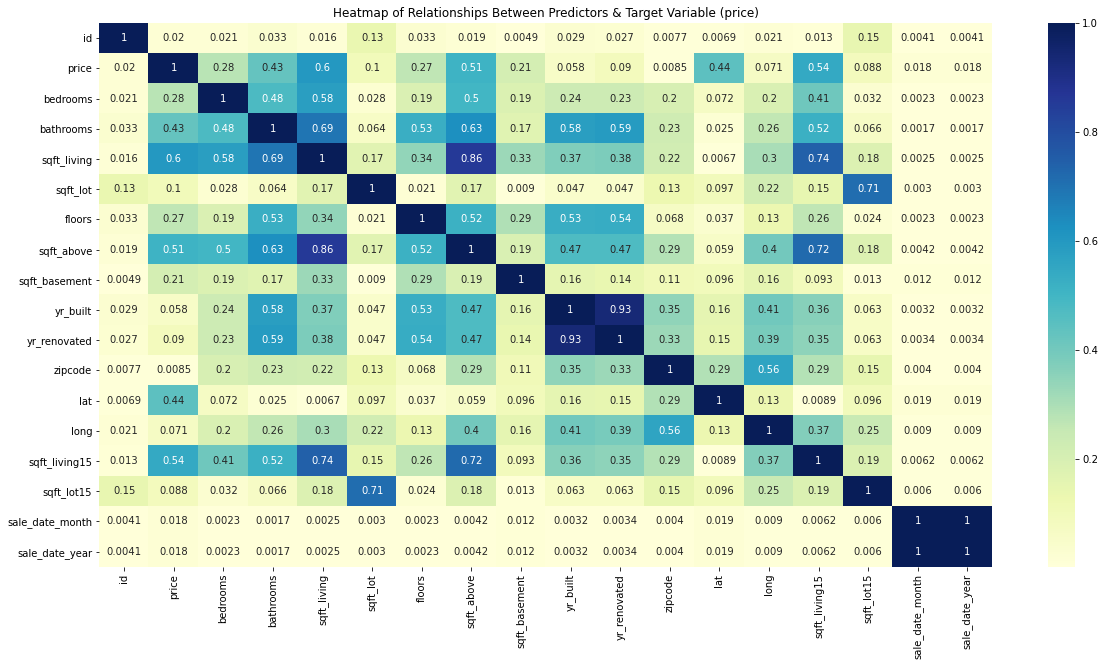

In [103]:
#Create a heat map to visualize our adjusted data frame (housing_data) in terms of correlation amongst all columns
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(housing_data.corr().abs(), annot=True, cmap="YlGnBu")
ax.set_title("Heatmap of Relationships Between Predictors & Target Variable (price)");
plt.show()

Based on the above graph we can see that our target variable has the strongest correlation with sqft_living, followed by sqft_above and bathrooms.

## Visualizations for the Stakeholder

In order to create a presentation for our stakeholder we will need several visualizations to support our ultimate recommendation. The first visualization will map out all homes sold between 2014 and 2015 that are within our stakeholder's budget.

In [104]:
#Create a map for the stakeholder which shows all sold homes from our data set that is within their budget
#Utilize the the latitude and longitude data points to map out the homes
fig = px.scatter_mapbox(raw_house_data.loc[raw_house_data['price'] <= 1000000], 
                        lat="lat", lon="long", zoom= 8, color = 'price',
                       width = 900, height = 800,
                       color_continuous_scale=px.colors.sequential.Cividis)
fig.update_layout(mapbox_style="open-street-map")

img_bytes = fig.to_image(format='png', width =  900, height = 800, scale=2)
Image(img_bytes)

fig.show()

Here we will create a data frame which will include the homes that fall under all of our stakeholder's requirements: (i) a budget of $1 million, (ii) a home with no more than 4 bedrooms, (iii) a waterfront home, and (iv) a home with a  nice view (scored at least a 3 on our 1-5 rating scale).

In [105]:
#Here, we will create a dataframe that encompasses all of our stakeholder's requirements

#Drop any NA values
price_view_waterfront_data = housing_data.dropna()

#Select any applicable columns needed for the visualizations
price_view_waterfront_data = price_view_waterfront_data[['zipcode', 'price', 'view', 'waterfront', 'yr_renovated']]

#Convert the qualitative variables (waterfront and view) to numeric values
price_view_waterfront_data['waterfront'] = price_view_waterfront_data['waterfront'].map({'NO':0, 'YES':1})
price_view_waterfront_data['view'] = price_view_waterfront_data['view'].map({'NONE':1,
                                                                             'FAIR':2,
                                                                             'AVERAGE':3,
                                                                            'GOOD': 4,
                                                                            'EXCELLENT': 5})

#Select only views that scored atleast a 3 on our 1-5 scale
price_view_waterfront_data = price_view_waterfront_data.loc[price_view_waterfront_data['view'] >= 3]

#Select the 6 zip codes with the most waterfront properties
price_view_waterfront_data = price_view_waterfront_data.loc[(price_view_waterfront_data['zipcode'] == 98070)\
                                              | (price_view_waterfront_data['zipcode'] == 98166)\
                                              | (price_view_waterfront_data['zipcode'] == 98146)\
                                              | (price_view_waterfront_data['zipcode'] == 98178)\
                                              | (price_view_waterfront_data['zipcode'] == 98198)\
                                              | (price_view_waterfront_data['zipcode'] == 98023)]

#Groupby the zip codes so that there are only 6 rows, show the top number of waterfront homes and reset the index
waterfront_price_grouped = price_view_waterfront_data.groupby(['zipcode']).sum()\
['waterfront'].sort_values(ascending = False)
waterfront_price_grouped = waterfront_price_grouped.rename_axis('zipcode').reset_index()

#Groupby the zip codes so that there are only 6 rows, show the average view scores and reset the index
view_price_grouped = price_view_waterfront_data.groupby(['zipcode']).mean()['view'].sort_values(ascending = False)
view_price_grouped = view_price_grouped.rename_axis('zipcode').reset_index()

#Groupby the zip codes so that there are only 6 rows, show the average year renovated and reset the index
year_price_grouped = price_view_waterfront_data.groupby(['zipcode']).mean()\
['yr_renovated'].sort_values(ascending = False)
year_price_grouped = year_price_grouped.rename_axis('zipcode').reset_index()

#Merge the waterfront and price data frames and remove the duplicate 'waterfront' columns
waterfront_price_merged = pd.merge(price_view_waterfront_data, waterfront_price_grouped, on='zipcode')
waterfront_price_merged = waterfront_price_merged.drop(['waterfront_x'], axis = 1)
waterfront_price_merged['waterfront count'] = waterfront_price_merged['waterfront_y']
waterfront_price_merged = waterfront_price_merged.drop(['waterfront_y'], axis = 1)

#Merge the waterfront and view data frames and remove the duplicate 'waterfront' columns
view_price_merged = pd.merge(price_view_waterfront_data, view_price_grouped, on='zipcode')
view_price_merged = view_price_merged.drop(['view_x'], axis = 1)
view_price_merged['view mean'] = view_price_merged['view_y']
view_price_merged = view_price_merged.drop(['view_y'], axis = 1)
view_price_merged['waterfront'] = waterfront_price_merged['waterfront count']

#Groupby the zip codes so that there are only 6 rows, show the average price and reset the index
view_price_graph1 = view_price_merged.groupby(['zipcode']).mean()['price'].sort_values(ascending = False)
view_price_graph1 = view_price_graph1.rename_axis('zipcode').reset_index()

#Groupby the zip codes so that there are only 6 rows, show the average waterfront and reset the index
view_price_graph2 = view_price_merged.groupby(['zipcode']).mean()['waterfront'].sort_values(ascending = False)
view_price_graph2 = view_price_graph2.rename_axis('zipcode').reset_index()

#Groupby the zip codes so that there are only 6 rows, show the average view score and reset the index
view_price_graph3 = view_price_merged.groupby(['zipcode']).mean()['view mean'].sort_values(ascending = False)
view_price_graph3 = view_price_graph3.rename_axis('zipcode').reset_index()

#Merge all of the data frames to a single data frame
view_price_graph_merge = pd.merge(view_price_graph1, view_price_graph2, on='zipcode')
view_price_graph_merge_2 = pd.merge(view_price_graph_merge, view_price_graph3, on='zipcode')
view_price_graph_merge_final = pd.merge(view_price_graph_merge_2, year_price_grouped, on='zipcode')

view_price_graph_merge_final

zipcode          price  waterfront  view mean  yr_renovated
0    98146  675477.083333           2   3.916667   1953.833333
1    98166  598426.216216           8   3.756757   1963.027027
2    98070  554723.473684          17   4.026316   1970.000000
3    98023  479226.470588           2   3.647059   1978.176471
4    98198  467951.145833           8   3.875000   1968.125000
5    98178  449556.428571           6   3.595238   1953.000000

In [106]:
#Create a graph showing the zipcodes by number of waterfront properties
fig = px.scatter(view_price_graph_merge_final, 
             x = list(view_price_graph_merge_final['price'].values),  
             y = list(view_price_graph_merge_final['waterfront'].values),
             color = ['98146', '98166', '98070', '98023', '98198', '98178'],
             title = "Top ZIP Codes by Number of Waterfront Properties",
             labels = {'x': 'Price', 'title': 'Number of Properties', 'y': 'Number of Waterfront Properties', 
                       'color': 'ZIP Codes'},
             color_discrete_sequence=[px.colors.qualitative.Plotly],
            color_discrete_map = {'98070': '#636EFA', 
                                  '98198': '#EF553B', 
                                  '98166': '#00CC96',
                                  '98178': '#AB63FA',
                                  '98146': '#FFA15A', 
                                  '98023': '#19D3F3'})

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         xaxis={'categoryorder':'total descending'})

fig.update_traces(marker=dict(size=40, symbol = 'square'))

img_bytes = fig.to_image(format='png', width =  900, height = 800, scale=2)
Image(img_bytes)


fig.show()

In [107]:
#Create a graph showing the zipcodes by average view score
fig = px.scatter(view_price_graph_merge_final, 
             x = list(view_price_graph_merge_final['price'].values),  
             y = list(view_price_graph_merge_final['view mean'].values),
             color = ['98146', '98166', '98070', '98023', '98198', '98178'],
             title = "Top ZIP Codes by Average View",
             labels = {'x': 'Price', 'title': 'Average View Rating', 'y': 'Number of Waterfront Properties', 
                       'color': 'ZIP Codes'},
             color_discrete_sequence=[px.colors.qualitative.Plotly],
            color_discrete_map = {'98070': '#636EFA', 
                                  '98198': '#EF553B', 
                                  '98166': '#00CC96',
                                  '98178': '#AB63FA',
                                  '98146': '#FFA15A', 
                                  '98023': '#19D3F3'})

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         xaxis={'categoryorder':'total descending'})

fig.update_traces(marker=dict(size=40, symbol = 'diamond'))
img_bytes = fig.to_image(format='png', width =  900, height = 800, scale=2)
Image(img_bytes)

fig.show()

In [108]:
#Create a graph showing the zipcodes by average year built
fig = px.scatter(view_price_graph_merge_final, 
             x = list(view_price_graph_merge_final['price'].values),  
             y = list(view_price_graph_merge_final['yr_renovated'].values),
             color = ['98146', '98166', '98070', '98023', '98198', '98178'],
             title = "Average Built/Renovated Year of Target Homes",
             labels = {'x': 'Price', 'title': 'Average Year Built/Renovated', 'y': 'Average Year Built/Renovated', 
                       'color': 'ZIP Codes'},
             color_discrete_sequence=[px.colors.qualitative.Plotly],
            color_discrete_map = {'98070': '#636EFA', 
                                  '98198': '#EF553B', 
                                  '98166': '#00CC96',
                                  '98178': '#AB63FA',
                                  '98146': '#FFA15A', 
                                  '98023': '#19D3F3'})

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'yanchor': 'top'},
         xaxis={'categoryorder':'total descending'})

fig.update_traces(marker=dict(size=40, symbol = 'circle'))

img_bytes = fig.to_image(format='png', width =  900, height = 800, scale=2)
Image(img_bytes)

fig.show()

In [109]:
#Create a list of coordinates for each zip code
x_98070_coord = [47.42073, -122.45094]
x_98198_coord = [47.38230, -122.31074]
x_98166_coord = [47.44796, -122.35840]
X_98178_coord = [47.49637, -122.25194]
X_98146_coord = [47.50035, -122.36334]
X_98023_coord = [47.30390, -122.37574]

ziplist = []
ziplist.append(X_98146_coord)
ziplist.append(x_98166_coord)
ziplist.append(x_98070_coord)
ziplist.append(X_98023_coord)
ziplist.append(x_98198_coord)
ziplist.append(X_98178_coord)

#Merge the lat, long and coordinates to our final data frame
view_price_graph_merge_final['coords'] = ziplist
view_price_graph_merge_final['lat'] = view_price_graph_merge_final['coords'].apply(lambda x: x[0])
view_price_graph_merge_final['long'] = view_price_graph_merge_final['coords'].apply(lambda x: x[1])
view_price_graph_merge_final

zipcode          price  waterfront  view mean  yr_renovated  \
0    98146  675477.083333           2   3.916667   1953.833333   
1    98166  598426.216216           8   3.756757   1963.027027   
2    98070  554723.473684          17   4.026316   1970.000000   
3    98023  479226.470588           2   3.647059   1978.176471   
4    98198  467951.145833           8   3.875000   1968.125000   
5    98178  449556.428571           6   3.595238   1953.000000   

                   coords       lat       long  
0  [47.50035, -122.36334]  47.50035 -122.36334  
1   [47.44796, -122.3584]  47.44796 -122.35840  
2  [47.42073, -122.45094]  47.42073 -122.45094  
3   [47.3039, -122.37574]  47.30390 -122.37574  
4   [47.3823, -122.31074]  47.38230 -122.31074  
5  [47.49637, -122.25194]  47.49637 -122.25194

In [110]:
#Create a map with just the target zip codes showing
fig = px.scatter_mapbox(view_price_graph_merge_final, 
                        lat="lat", 
                        lon="long", 
                        zoom= 10, 
                        color = 'price', 
                        size = 'price', 
                        hover_data = ['waterfront', 
                                      'view mean', 
                                      'yr_renovated',
                                     'zipcode'],
                        size_max=70,
                        width = 1000, 
                        height = 900,
                       color_continuous_scale=px.colors.sequential.Cividis)
fig.update_layout(mapbox_style="open-street-map")

img_bytes = fig.to_image(format='png', width =  1000, height = 900, scale=2)
Image(img_bytes)

fig.show()

# 1) Being Modeling

## 1a) Drop Unnecessary Columns

In [111]:
#Here we will drop any column not needed for the modeling process
housing_data = housing_data.drop(['id', 'lat', 'long', 'sale_date_month', 'sale_date_year', 'sqft_lot15'], axis = 1)
housing_data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         NO   
1  538000.0         3       2.25         2570      7242     2.0         NO   
2  180000.0         2       1.00          770     10000     1.0         NO   
3  604000.0         4       3.00         1960      5000     1.0         NO   
4  510000.0         3       2.00         1680      8080     1.0         NO   

   view  condition    grade  sqft_above  sqft_basement  yr_built  \
0  NONE    Average  Average        1180            0.0      1955   
1  NONE    Average  Average        2170          400.0      1951   
2  NONE    Average      Low         770            0.0      1933   
3  NONE  Very Good  Average        1050          910.0      1965   
4  NONE    Average     Good        1680            0.0      1987   

   yr_renovated  zipcode  sqft_living15  
0        1955.0    98178           1340  
1        1991.0    98125           1690  
2        1933.0    98028           2720  
3        1965.0    98136           1360  
4        1987.0    98074           1800

## 1b) Baseline Model

For our baseline model, we will only model the property square footage against our target variable, price. We are utilizing square footage as our first and only variable since this was previously identified as the strongest coefficient against price by our heat map.

In [112]:
#Define X and y variables
X_baseline = housing_data.drop(columns='price')
y_baseline = housing_data['price']

#Train, test, split, here
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, 
                                                                                        y_baseline, 
                                                                                        test_size=0.33, 
                                                                                        random_state=42)

# select our best correlated predictor, as our X Train
X_train_baseline = X_train_baseline[['sqft_living']]

# Do the same for X Test
X_test_baseline = X_test_baseline[['sqft_living']]

X_train_baseline.head()

sqft_living
3823          2680
1292          4930
14992         2740
21168         1350
14340         1220

In [113]:
#Create the model using OLS
baseline_model_OLS = sm.OLS(endog=y_train_baseline, exog=sm.add_constant(X_train_baseline)).fit()
baseline_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     6992.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:31   Log-Likelihood:            -1.6645e+05
No. Observations:               12453   AIC:                         3.329e+05
Df Residuals:                   12451   BIC:                         3.329e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.555e+05   3905.969     39.812      0.000    1.48e+05    1.63e+05
sqft_living   161.3502      1.930     83.620      0.000     157.568     165.132
==============================================================================
Omnibus:                      486.809   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.649
Skew:                           0.513   Prob(JB):                    3.26e-119
Kurtosis:                       3.029   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1c) Error Handling

Here we will see check to see the model's adjusted $R^2$, Root Mean Squared Error, and Mean Absolute Error. The adjusted $R^2$, or the coefficient of determination, will allow us to measure how well the model fits the data and explains how much variance the model is explaining. The root mean squared error (RMSE) calculates the squared value of each error, sums them, then takes the square root at the end. The mean absolute error (MAE) calculates the absolute value of each error before adding it to the sum. When comparing these two metrics, the RMSE should always be larger than the MAE.

In [114]:
#Utilize SKLearn's linear regression function
lr = LinearRegression()

#Fit and score the baseline variables
lr.fit(X_train_baseline, y_train_baseline)
lr.score(X_train_baseline, y_train_baseline)

#Create a prediction baseline variable
y_pred_baseline = lr.predict(X_test_baseline)

#Calculate the RMSE
baseline_model_RMSE = mean_squared_error(y_test_baseline, y_pred_baseline, squared = False)

#Calculate the MAE
baseline_model_MAE = mean_absolute_error(y_test_baseline, y_pred_baseline)

#Calculate the adjusted r-squared
baseline_model_rsquared_adj = baseline_model_OLS.rsquared_adj

print(f'''The baseline model's root mean squared error is ${round(baseline_model_RMSE, 2)}.''')
print(f'''The baseline model's mean absolute error is ${round(baseline_model_MAE, 2)}.''')
print(f'''The baseline model's adjusted r-squared is {round(baseline_model_rsquared_adj*100)}%.''')

The baseline model's root mean squared error is $154293.6.
The baseline model's mean absolute error is $125692.42.
The baseline model's adjusted r-squared is 36.0%.


## 2) Second Model

With our second model we will make adjustments to our variables with goal of minimizing our error metrics. This second model will now include all of the data set's variables (with the exception of our target variable, 'price'). The model will also scale any numeric variables and encode the ordinal and nominal variables.

### 2a) Second Model (Inclusive of All Variables)

In [115]:
#Define X and y variables
X_2 = housing_data.drop(columns='price')
y_2 = housing_data['price']

#Train, test, split, here
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)

#Separate Categorical (Ordinal vs. Nomial) vs. Numerical

#Numerical
X_train_numerical_2 = X_train_2.drop(['condition', 'view', 'waterfront', 'grade'], axis = 1)
X_test_numerical_2 = X_test_2.drop(['condition', 'view', 'waterfront', 'grade'], axis = 1)

# Instantiate a new scaler
scaler = StandardScaler()

# Scale the Categoricals
X_train_numerical_scaled_2 = scaler.fit_transform(X_train_numerical_2)
X_test_numerical_scaled_2 = scaler.transform(X_test_numerical_2)

# Turn into data frames
X_train_numerical_scaled_2 = pd.DataFrame(X_train_numerical_scaled_2,
                              columns = X_train_numerical_2.columns,
                              index = X_train_numerical_2.index)
X_test_numerical_scaled_2 = pd.DataFrame(X_test_numerical_scaled_2,
                             columns=X_test_numerical_2.columns,
                             index=X_test_numerical_2.index)

# Categorical - Ordinal
ordinal_columns_2 = ['condition', 'view', 'grade']
X_train_ordinal_2 = X_train_2[ordinal_columns_2]
X_test_ordinal_2 = X_test_2[ordinal_columns_2]
    
# One Hot Encoder
ordinal = OrdinalEncoder()

X_train_ordinal_2 = pd.DataFrame(
    ordinal.fit_transform(X_train_ordinal_2),
    columns = X_train_ordinal_2.columns,
    index = X_train_ordinal_2.index)

X_test_ordinal_2 = pd.DataFrame(
    ordinal.transform(X_test_ordinal_2),
    columns = X_test_ordinal_2.columns,
    index = X_test_ordinal_2.index)


# Categorical - Nominal
nominal_columns_2 = ['waterfront']

X_train_nominal_2 = X_train_2[nominal_columns_2]
X_test_nominal_2 = X_test_2[nominal_columns_2]


# One Hot Encoder
one = OneHotEncoder(sparse = False, drop = 'first')

X_train_nominal_2 = pd.DataFrame(
    one.fit_transform(X_train_nominal_2),
    columns = one.get_feature_names(nominal_columns_2),
    index = X_train_nominal_2.index)

X_test_nominal_2 = pd.DataFrame(
    one.transform(X_test_nominal_2),
    columns = one.get_feature_names(nominal_columns_2),
    index = X_test_nominal_2.index)

#Concat all trains/tests
X_train_2 = pd.concat([X_train_numerical_scaled_2, X_train_ordinal_2, X_train_nominal_2], axis=1)
X_test_2 = pd.concat([X_test_numerical_scaled_2, X_test_ordinal_2, X_test_nominal_2], axis=1)
                              
X_train_2.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  sqft_above  \
3823  -1.657376   0.749950     1.097432 -0.182906 -0.872366    1.485798   
1292   1.187071   3.351791     4.234892  0.285891  0.992626    4.754019   
14992 -0.235153   0.006566     1.181098  0.229370  0.992626    1.572950   
21168 -0.235153   0.749950    -0.757155 -0.341696  0.992626   -0.780169   
14340 -3.079600  -1.480200    -0.938430 -0.054103 -0.872366   -0.634915   

       sqft_basement  yr_built  yr_renovated   zipcode  sqft_living15  \
3823       -0.622796  1.133764      1.089317 -0.491518       0.728109   
1292       -0.622796  1.168024      1.124038  0.240878       2.941127   
14992      -0.622796  0.585604      0.533779 -1.468046       1.550571   
21168      -0.003419  1.236544      1.193480  0.710362      -0.653968   
14340      -0.622796 -0.853318     -0.924508  2.231492       1.499697   

       condition  view  grade  waterfront_YES  
3823         0.0   4.0    1.0             0.0  
1292         0.0   4.0    2.0             0.0  
14992        0.0   1.0    1.0             0.0  
21168        0.0   4.0    3.0             0.0  
14340        2.0   1.0    4.0             0.0

In [116]:
#Create the model using OLS
second_model_OLS = sm.OLS(endog=np.log(y_train_2), exog=sm.add_constant(X_train_2)).fit()
second_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     683.7
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:31   Log-Likelihood:                -3446.3
No. Observations:               12453   AIC:                             6925.
Df Residuals:                   12437   BIC:                             7043.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0483      0.015    874.807      0.000      13.019      13.078
bedrooms          -0.0356      0.004     -9.824      0.000      -0.043      -0.028
bathrooms          0.0687      0.005     13.959      0.000       0.059       0.078
sqft_living        0.1762      0.033      5.267      0.000       0.111       0.242
sqft_lot           0.0044      0.003      1.495      0.135      -0.001       0.010
floors             0.0876      0.004     21.306      0.000       0.080       0.096
sqft_above        -0.0358      0.032     -1.115      0.265      -0.099       0.027
sqft_basement      0.0060      0.017      0.350      0.727      -0.028       0.040
yr_built          -0.1369      0.008    -16.817      0.000      -0.153      -0.121
yr_renovated       0.0217      0.008      2.623      0.009       0.005       0.038
zipcode            0.0348      0.003     10.655      0.000       0.028       0.041
sqft_living15      0.1291      0.005     28.348      0.000       0.120       0.138
condition          0.0168      0.003      6.469      0.000       0.012       0.022
view              -0.0251      0.004     -6.769      0.000      -0.032      -0.018
grade             -0.0106      0.002     -5.710      0.000      -0.014      -0.007
waterfront_YES     0.2002      0.058      3.432      0.001       0.086       0.315
==============================================================================
Omnibus:                       95.362   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.415
Skew:                          -0.216   Prob(JB):                     7.03e-22
Kurtosis:                       3.019   Cond. No.                         89.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2b) Error Handling

In [117]:
#Utilize SKLearn's linear regression function
lr = LinearRegression()

#Fit and score the baseline variables
lr.fit(X_train_2, np.log(y_train_2))
lr.score(X_train_2, np.log(y_train_2))

#Create a prediction variable
y_pred_2 = lr.predict(X_test_2)

#Un-log the prediction
y_pred_error_2 = np.exp(y_pred_2)

#Calculate the RMSE
model_2_RMSE = mean_squared_error(y_test_2, y_pred_error_2, squared = False)

#Calculate the MAE
model_2_MAE = mean_absolute_error(y_test_2, y_pred_error_2)

#Calculate the adjusted r-squared
model_2_rsquared_adj = second_model_OLS.rsquared_adj

print(f'''The second model's root mean squared error is ${round(model_2_RMSE, 2)}.''')
print(f'''The second model's mean absolute error is ${round(model_2_MAE, 2)}.''')
print(f'''The second model's adjusted r-squared is {round(model_2_rsquared_adj*100)}%.''')

print(f'''\

The baseline model's root mean squared error is ${round(baseline_model_RMSE, 2)}.''')
print(f'''The baseline model's mean absolute error is ${round(baseline_model_MAE, 2)}.''')
print(f'''The baseline model's adjusted r-squared is {round(baseline_model_rsquared_adj*100)}%.''')

The second model's root mean squared error is $143609.79.
The second model's mean absolute error is $112584.97.
The second model's adjusted r-squared is 45.0%.

The baseline model's root mean squared error is $154293.6.
The baseline model's mean absolute error is $125692.42.
The baseline model's adjusted r-squared is 36.0%.


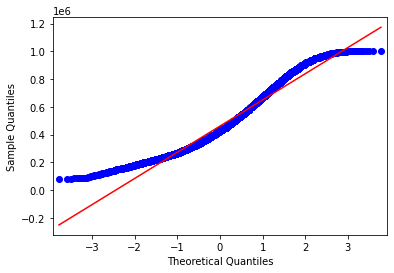

In [118]:
#Map the model's residuals against a regression line
train_residuals_2 = y_train_2 - lr.predict(X_train_2)
sm.qqplot(train_residuals_2, line = 'r');

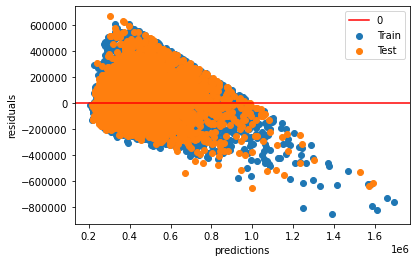

In [119]:
#Create a graph mapping out the test residuals agains the train residuals to view the relationship between the
#residuals versus the predictions
train_preds_2 = lr.predict(X_train_2)
train_residuals_2 = y_train_2 - np.exp(train_preds_2)
test_residuals_2 = y_test_2 - np.exp(y_pred_2)

plt.scatter(np.exp(train_preds_2), train_residuals_2, label='Train')
plt.scatter(np.exp(y_pred_2), test_residuals_2, label='Test')

plt.axhline(y = 0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

## 3) Third Model (Zip Code Hot Encoding)

With our third model we will make adjustments to our variables with goal of again, minimizing our error metrics. This third model will again include all of the data set's variables (with the exception of our target variable, 'price'). The model will again scale any numeric variables and encode the ordinal and nominal variables. This time however we will treat the zip code variable as a nominal variable and 'hot encode' it to create separate columns for each zip code.

### 3a) Third Model (Inclusive of All Variables and Zipcode Hot Encoding)

In [120]:
# Define X and y variables
X_3 = housing_data.drop(columns='price')
y_3 = housing_data['price']

# Train, test, split, here
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.33, random_state=42)

# Separate Categorical (Ordinal vs. Nomial) vs. Numerical

# Numerical
X_train_numerical_3 = X_train_3.drop(['condition', 'view', 'waterfront', 'zipcode', 'grade'], axis = 1)
X_test_numerical_3 = X_test_3.drop(['condition', 'view', 'waterfront', 'zipcode', 'grade'], axis = 1)

# Scale the Categoricals
X_train_numerical_scaled_3 = scaler.fit_transform(X_train_numerical_3)
X_test_numerical_scaled_3 = scaler.transform(X_test_numerical_3)

# Turn into data frames
X_train_numerical_scaled_3 = pd.DataFrame(X_train_numerical_scaled_3,
                              columns=X_train_numerical_3.columns,
                              index=X_train_numerical_3.index)
X_test_numerical_scaled_3 = pd.DataFrame(X_test_numerical_scaled_3,
                             columns=X_test_numerical_3.columns,
                             index=X_test_numerical_3.index)

# Categorical - Ordinal
ordinal_columns_3 = ['condition', 'view', 'grade']
X_train_ordinal_3 = X_train_3[ordinal_columns_3]
X_test_ordinal_3 = X_test_3[ordinal_columns_3]
    
# One Hot Encoder
X_train_ordinal_3 = pd.DataFrame(
    ordinal.fit_transform(X_train_ordinal_3),
    columns = X_train_ordinal_3.columns,
    index = X_train_ordinal_3.index)

X_test_ordinal_3 = pd.DataFrame(
    ordinal.transform(X_test_ordinal_3),
    columns = X_test_ordinal_3.columns,
    index = X_test_ordinal_3.index)


# Categorical - Nominal
nominal_columns_3 = ['waterfront', 'zipcode']

X_train_nominal_3 = X_train_3[nominal_columns_3]
X_test_nominal_3 = X_test_3[nominal_columns_3]


# One Hot Encoder
X_train_nominal_3 = pd.DataFrame(
    one.fit_transform(X_train_nominal_3),
    columns = one.get_feature_names(nominal_columns_3),
    index = X_train_nominal_3.index)

X_test_nominal_3 = pd.DataFrame(
    one.transform(X_test_nominal_3),
    columns = one.get_feature_names(nominal_columns_3),
    index = X_test_nominal_3.index)

# Concat all trains/tests
X_train_3 = pd.concat([X_train_numerical_scaled_3, X_train_ordinal_3, X_train_nominal_3], axis=1)
X_test_3 = pd.concat([X_test_numerical_scaled_3, X_test_ordinal_3, X_test_nominal_3], axis=1)
                              

X_train_3.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  sqft_above  \
3823  -1.657376   0.749950     1.097432 -0.182906 -0.872366    1.485798   
1292   1.187071   3.351791     4.234892  0.285891  0.992626    4.754019   
14992 -0.235153   0.006566     1.181098  0.229370  0.992626    1.572950   
21168 -0.235153   0.749950    -0.757155 -0.341696  0.992626   -0.780169   
14340 -3.079600  -1.480200    -0.938430 -0.054103 -0.872366   -0.634915   

       sqft_basement  yr_built  yr_renovated  sqft_living15  ...  \
3823       -0.622796  1.133764      1.089317       0.728109  ...   
1292       -0.622796  1.168024      1.124038       2.941127  ...   
14992      -0.622796  0.585604      0.533779       1.550571  ...   
21168      -0.003419  1.236544      1.193480      -0.653968  ...   
14340      -0.622796 -0.853318     -0.924508       1.499697  ...   

       zipcode_98146  zipcode_98148  zipcode_98155  zipcode_98166  \
3823             0.0            0.0            0.0            0.0   
1292             0.0            0.0            0.0            0.0   
14992            0.0            0.0            0.0            0.0   
21168            0.0            0.0            0.0            0.0   
14340            0.0            0.0            0.0            0.0   

       zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
3823             0.0            0.0            0.0            0.0   
1292             0.0            0.0            0.0            0.0   
14992            0.0            0.0            0.0            0.0   
21168            0.0            0.0            0.0            0.0   
14340            0.0            0.0            0.0            0.0   

       zipcode_98198  zipcode_98199  
3823             0.0            0.0  
1292             0.0            0.0  
14992            0.0            0.0  
21168            0.0            0.0  
14340            1.0            0.0  

[5 rows x 83 columns]

In [121]:
#Create the model using OLS
third_model_OLS = sm.OLS(endog=np.log(y_train_3), exog=sm.add_constant(X_train_3)).fit()
third_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     676.2
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:31   Log-Likelihood:                 3466.2
No. Observations:               12453   AIC:                            -6764.
Df Residuals:                   12369   BIC:                            -6140.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.6260      0.015    821.796      0.000      12.596      12.656
bedrooms           0.0042      0.002      1.981      0.048    4.37e-05       0.008
bathrooms          0.0347      0.003     12.109      0.000       0.029       0.040
sqft_living        0.1303      0.019      6.749      0.000       0.092       0.168
sqft_lot           0.0290      0.002     15.837      0.000       0.025       0.033
floors            -0.0169      0.003     -6.386      0.000      -0.022      -0.012
sqft_above         0.0596      0.019      3.209      0.001       0.023       0.096
sqft_basement     -0.0052      0.010     -0.518      0.605      -0.025       0.014
yr_built          -0.0354      0.005     -7.358      0.000      -0.045      -0.026
yr_renovated       0.0403      0.005      8.407      0.000       0.031       0.050
sqft_living15      0.0700      0.003     25.049      0.000       0.065       0.075
condition          0.0228      0.002     14.832      0.000       0.020       0.026
view              -0.0360      0.002    -16.442      0.000      -0.040      -0.032
grade             -0.0036      0.001     -3.343      0.001      -0.006      -0.002
waterfront_YES     0.4775      0.035     13.726      0.000       0.409       0.546
zipcode_98002     -0.0435      0.021     -2.086      0.037      -0.084      -0.003
zipcode_98003      0.0256      0.019      1.353      0.176      -0.011       0.063
zipcode_98004      1.0388      0.024     42.641      0.000       0.991       1.087
zipcode_98005      0.7728      0.025     31.214      0.000       0.724       0.821
zipcode_98006      0.6742      0.018     37.215      0.000       0.639       0.710
zipcode_98007      0.6659      0.026     25.798      0.000       0.615       0.717
zipcode_98008      0.6602      0.020     33.066      0.000       0.621       0.699
zipcode_98010      0.2448      0.025      9.653      0.000       0.195       0.295
zipcode_98011      0.4569      0.021     21.395      0.000       0.415       0.499
zipcode_98014      0.2687      0.024     11.308      0.000       0.222       0.315
zipcode_98019      0.2915      0.021     13.785      0.000       0.250       0.333
zipcode_98022      0.0295      0.020      1.485      0.137      -0.009       0.068
zipcode_98023     -0.0316      0.016     -1.924      0.054      -0.064       0.001
zipcode_98024      0.3852      0.030     12.787      0.000       0.326       0.444
zipcode_98027      0.5218      0.018     29.664      0.000       0.487       0.556
zipcode_98028      0.4173      0.018     22.756      0.000       0.381       0.453
zipcode_98029      0.6296      0.018     34.203      0.000       0.593       0.666
zipcode_98030      0.0244      0.020      1.244      0.214      -0.014       0.063
zipcode_98031      0.0709      0.020      3.628      0.000       0.033       0.109
zipcode_9803

### 3b) Error Handling

In [122]:
#Utilize SKLearn's linear regression function
lr = LinearRegression()

#Fit and score the baseline variables
lr.fit(X_train_3, np.log(y_train_3))
lr.score(X_train_3, np.log(y_train_3))

#Create a prediction variable
y_pred_3 = lr.predict(X_test_3)

#Un-log the prediction
y_pred_error_3 = np.exp(y_pred_3)

#Calculate the RMSE
model_3_RMSE = mean_squared_error(y_test_3, y_pred_error_3, squared = False)

#Calculate the MAE
model_3_MAE = mean_absolute_error(y_test_3, y_pred_error_3)

#Calculate the adjusted r-squared
model_3_rsquared_adj = third_model_OLS.rsquared_adj

print(f'''The third model's root mean squared error is ${round(model_3_RMSE, 2)}.''')
print(f'''The third model's mean absolute error is ${round(model_3_MAE, 2)}.''')
print(f'''The third model's adjusted r-squared is {round(model_3_rsquared_adj*100)}%.''')

print(f'''\

The second model's root mean squared error is ${round(model_2_RMSE, 2)}.''')
print(f'''The second model's mean absolute error is ${round(model_2_MAE, 2)}.''')
print(f'''The second model's adjusted r-squared is {round(model_2_rsquared_adj*100)}%.''')

The third model's root mean squared error is $85627.22.
The third model's mean absolute error is $60167.81.
The third model's adjusted r-squared is 82.0%.

The second model's root mean squared error is $143609.79.
The second model's mean absolute error is $112584.97.
The second model's adjusted r-squared is 45.0%.


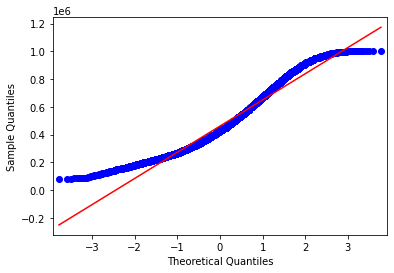

In [123]:
#Map the model's residuals against a regression line
train_residuals_3 = y_train_3 - lr.predict(X_train_3)
sm.qqplot(train_residuals_3, line = 'r');

<AxesSubplot:xlabel='price'>

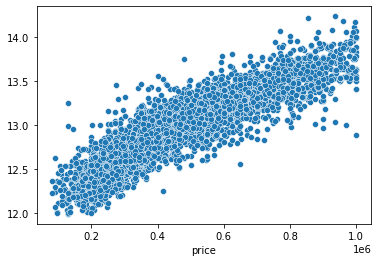

In [124]:
#Compare prediction vs. test
sns.scatterplot(y = y_pred_3, x = y_test_3)

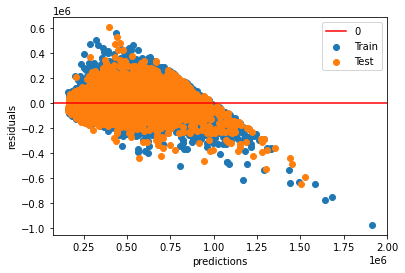

In [125]:
#Create a graph mapping out the test residuals agains the train residuals to view the relationship between the
#residuals versus the predictions
train_preds_3 = lr.predict(X_train_3)
train_residuals_3 = y_train_3 - np.exp(train_preds_3)
test_residuals_3 = y_test_3 - np.exp(y_pred_3)

plt.scatter(np.exp(train_preds_3), train_residuals_3, label='Train')
plt.scatter(np.exp(y_pred_3), test_residuals_3, label='Test')

plt.axhline(y = 0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

### 3c) Create a Dictionary of Columns with P-values Less than the Alpha

In anticipation for our fourth model, we will create a dictionary of the third model's 'p-values' that will only include variables that have p-values above our determined alpha, 0.05. Ultimately we will drop these variables to not include in our fourth model.

In [126]:
#Create a dictionary of all of the third model's variables and their corresponding p-values
third_model_pvalues = dict(third_model_OLS.pvalues)

#Create a new dictionary of just p-values that are greater than our alpha of 0.05
third_model_insignif_pvalues = {}
alpha = 0.05

for i in third_model_pvalues:
    if third_model_pvalues[i] > alpha:
        third_model_insignif_pvalues[i] = third_model_pvalues[i]
third_model_insignif_pvalues

{'sqft_basement': 0.6047210057168657,
 'zipcode_98003': 0.17619254541065058,
 'zipcode_98022': 0.13749532041159468,
 'zipcode_98023': 0.054435992963274914,
 'zipcode_98030': 0.21356791338139242,
 'zipcode_98032': 0.2147552649446892,
 'zipcode_98092': 0.07412535096489133}

## 4) Fourth Model

With the fourth model we will remove certain variables with goal of again, minimizing our error metrics. This fourth model will again include all of the data set's variables with the exception of our target variable, 'price' and the 6 variables with p-values greater than our alpha of 0.05. These variables include 6 zip codes and basement square footage. Similar to the previous model, this model will again scale any numeric variables and encode the ordinal and nominal variables.

### 4a) Drop Columns Based on P-Values

In [127]:
#Include the our target variable, 'price', to a list of variables to exclude from this model
fourth_model_columns_to_drop = list(third_model_insignif_pvalues.keys())
fourth_model_columns_to_drop.append('price')
fourth_model_columns_to_drop

['sqft_basement',
 'zipcode_98003',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98030',
 'zipcode_98032',
 'zipcode_98092',
 'price']

### 4b) Build Fourth Model

In [128]:
#Define X and y variables
#In addition to 'sqft_basement' we will remove the 'bedrooms' variable
X_4 = housing_data.drop(['price', 'sqft_basement'], 
                        axis = 1)
y_4 = housing_data['price']

#Train, test, split, here
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.33, random_state=42)

#Separate Categorical (Ordinal vs. Nomial) vs. Numerical
#Numerical
X_train_numerical_4 = X_train_4.drop(['condition', 'view', 'waterfront', 'zipcode', 'grade'], axis = 1)
X_test_numerical_4 = X_test_4.drop(['condition', 'view', 'waterfront', 'zipcode', 'grade'], axis = 1)

# Scale the Categoricals
X_train_numerical_scaled_4 = scaler.fit_transform(X_train_numerical_4)
X_test_numerical_scaled_4 = scaler.transform(X_test_numerical_4)

# Turn into data frames
X_train_numerical_scaled_4 = pd.DataFrame(X_train_numerical_scaled_4,
                              columns=X_train_numerical_4.columns,
                              index=X_train_numerical_4.index)
X_test_numerical_scaled_4 = pd.DataFrame(X_test_numerical_scaled_4,
                             columns=X_test_numerical_4.columns,
                             index=X_test_numerical_4.index)

# Categorical - Ordinal
ordinal_columns_4 = ['condition', 'view', 'grade']
X_train_ordinal_4 = X_train_4[ordinal_columns_4]
X_test_ordinal_4 = X_test_4[ordinal_columns_4]
    
# One Hot Encoder
X_train_ordinal_4 = pd.DataFrame(
    ordinal.fit_transform(X_train_ordinal_4),
    columns = X_train_ordinal_4.columns,
    index = X_train_ordinal_4.index)

X_test_ordinal_4 = pd.DataFrame(
    ordinal.transform(X_test_ordinal_4),
    columns = X_test_ordinal_4.columns,
    index = X_test_ordinal_4.index)


# Categorical - Nominal
nominal_columns_4 = ['waterfront', 'zipcode']

X_train_nominal_4 = X_train_4[nominal_columns_4]
X_test_nominal_4 = X_test_4[nominal_columns_4]


# One Hot Encoder
X_train_nominal_4 = pd.DataFrame(
    one.fit_transform(X_train_nominal_4),
    columns = one.get_feature_names(nominal_columns_4),
    index = X_train_nominal_4.index)

X_train_nominal_4 = X_train_nominal_4.drop(['zipcode_98022', 'zipcode_98003', 'zipcode_98023', 
                                            'zipcode_98030', 'zipcode_98032', 'zipcode_98092'], axis = 1)

X_test_nominal_4 = pd.DataFrame(
    one.transform(X_test_nominal_4),
    columns = one.get_feature_names(nominal_columns_4),
    index = X_test_nominal_4.index)

X_test_nominal_4 = X_test_nominal_4.drop(['zipcode_98022', 'zipcode_98003', 'zipcode_98023', 
                                            'zipcode_98030', 'zipcode_98032', 'zipcode_98092'], axis = 1)

# Concat all trains/tests
X_train_4 = pd.concat([X_train_numerical_scaled_4, X_train_ordinal_4, X_train_nominal_4], axis=1)
X_test_4 = pd.concat([X_test_numerical_scaled_4, X_test_ordinal_4, X_test_nominal_4], axis=1)
                              

X_train_4.head()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  sqft_above  \
3823  -1.657376   0.749950     1.097432 -0.182906 -0.872366    1.485798   
1292   1.187071   3.351791     4.234892  0.285891  0.992626    4.754019   
14992 -0.235153   0.006566     1.181098  0.229370  0.992626    1.572950   
21168 -0.235153   0.749950    -0.757155 -0.341696  0.992626   -0.780169   
14340 -3.079600  -1.480200    -0.938430 -0.054103 -0.872366   -0.634915   

       yr_built  yr_renovated  sqft_living15  condition  ...  zipcode_98146  \
3823   1.133764      1.089317       0.728109        0.0  ...            0.0   
1292   1.168024      1.124038       2.941127        0.0  ...            0.0   
14992  0.585604      0.533779       1.550571        0.0  ...            0.0   
21168  1.236544      1.193480      -0.653968        0.0  ...            0.0   
14340 -0.853318     -0.924508       1.499697        2.0  ...            0.0   

       zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
3823             0.0            0.0            0.0            0.0   
1292             0.0            0.0            0.0            0.0   
14992            0.0            0.0            0.0            0.0   
21168            0.0            0.0            0.0            0.0   
14340            0.0            0.0            0.0            0.0   

       zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
3823             0.0            0.0            0.0            0.0   
1292             0.0            0.0            0.0            0.0   
14992            0.0            0.0            0.0            0.0   
21168            0.0            0.0            0.0            0.0   
14340            0.0            0.0            0.0            1.0   

       zipcode_98199  
3823             0.0  
1292             0.0  
14992            0.0  
21168            0.0  
14340            0.0  

[5 rows x 76 columns]

In [129]:
#Create the model using OLS
fourth_model_OLS = sm.OLS(endog=np.log(y_train_4), exog=sm.add_constant(X_train_4)).fit()
fourth_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     736.9
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:32   Log-Likelihood:                 3452.9
No. Observations:               12453   AIC:                            -6752.
Df Residuals:                   12376   BIC:                            -6180.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.6326      0.010   1252.464      0.000      12.613      12.652
bedrooms           0.0041      0.002      1.909      0.056      -0.000       0.008
bathrooms          0.0350      0.003     12.184      0.000       0.029       0.041
sqft_living        0.1197      0.004     27.735      0.000       0.111       0.128
sqft_lot           0.0298      0.002     16.491      0.000       0.026       0.033
floors            -0.0170      0.003     -6.404      0.000      -0.022      -0.012
sqft_above         0.0700      0.004     16.581      0.000       0.062       0.078
yr_built          -0.0353      0.005     -7.346      0.000      -0.045      -0.026
yr_renovated       0.0406      0.005      8.453      0.000       0.031       0.050
sqft_living15      0.0699      0.003     25.030      0.000       0.064       0.075
condition          0.0229      0.002     14.949      0.000       0.020       0.026
view              -0.0363      0.002    -16.635      0.000      -0.041      -0.032
grade             -0.0037      0.001     -3.383      0.001      -0.006      -0.002
waterfront_YES     0.4761      0.035     13.676      0.000       0.408       0.544
zipcode_98002     -0.0490      0.017     -2.818      0.005      -0.083      -0.015
zipcode_98004      1.0337      0.021     48.240      0.000       0.992       1.076
zipcode_98005      0.7675      0.022     35.110      0.000       0.725       0.810
zipcode_98006      0.6688      0.014     48.191      0.000       0.642       0.696
zipcode_98007      0.6606      0.023     28.623      0.000       0.615       0.706
zipcode_98008      0.6548      0.016     40.261      0.000       0.623       0.687
zipcode_98010      0.2381      0.023     10.567      0.000       0.194       0.282
zipcode_98011      0.4514      0.018     25.153      0.000       0.416       0.487
zipcode_98014      0.2613      0.021     12.626      0.000       0.221       0.302
zipcode_98019      0.2852      0.018     16.123      0.000       0.250       0.320
zipcode_98024      0.3780      0.028     13.607      0.000       0.324       0.432
zipcode_98027      0.5162      0.013     39.126      0.000       0.490       0.542
zipcode_98028      0.4119      0.014     28.978      0.000       0.384       0.440
zipcode_98029      0.6239      0.014     43.606      0.000       0.596       0.652
zipcode_98031      0.0657      0.016      4.165      0.000       0.035       0.097
zipcode_98033      0.7442      0.013     55.918      0.000       0.718       0.770
zipcode_98034      0.5326      0.012     46.256      0.000       0.510       0.555
zipcode_98038      0.1348      0.011     12.155      0.000       0.113       0.157
zipcode_98039      1.2944      0.083     15.689      0.000       1.133       1.456
zipcode_98040      0.8679      0.022     39.563      0.000       0.825       0.911
zipcode_9804

### 4c)  Error Handling

In [130]:
#Utilize SKLearn's linear regression function
lr = LinearRegression()

#Fit and score the baseline variables
lr.fit(X_train_4, np.log(y_train_4))
lr.score(X_train_4, np.log(y_train_4))

#Create a prediction variable
y_pred_4 = lr.predict(X_test_4)

#Un-log the prediction
y_pred_error_4 = np.exp(y_pred_4)

#Calculate the RMSE
model_4_RMSE = mean_squared_error(y_test_4, y_pred_error_4, squared = False)

#Calculate the MAE
model_4_MAE = mean_absolute_error(y_test_4, y_pred_error_4)

#Calculate the adjusted r-squared
model_4_rsquared_adj = fourth_model_OLS.rsquared_adj

print(f'''The fourth model's root mean squared error is ${round(model_4_RMSE, 2)}.''')
print(f'''The fourth model's mean absolute error is ${round(model_4_MAE, 2)}.''')
print(f'''The second model's adjusted r-squared is {round(model_4_rsquared_adj*100)}%.''')

print(f'''
The third model's root mean squared error was ${round(model_3_RMSE, 2)}.''')
print(f'''The third model's mean absolute error was ${round(model_3_MAE, 2)}.''')
print(f'''The third model's adjusted r-squared was {round(model_3_rsquared_adj*100)}%.''')

The fourth model's root mean squared error is $85746.37.
The fourth model's mean absolute error is $60274.08.
The second model's adjusted r-squared is 82.0%.

The third model's root mean squared error was $85627.22.
The third model's mean absolute error was $60167.81.
The third model's adjusted r-squared was 82.0%.


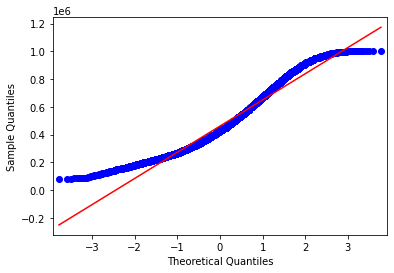

In [131]:
#Map the model's residuals against a regression line
train_residuals_4 = y_train_4 - lr.predict(X_train_4)
sm.qqplot(train_residuals_4, line = 'r');

<AxesSubplot:xlabel='price'>

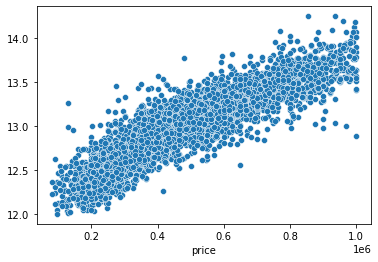

In [132]:
#Compare prediction vs. test
sns.scatterplot(y = y_pred_4, x = y_test_4)

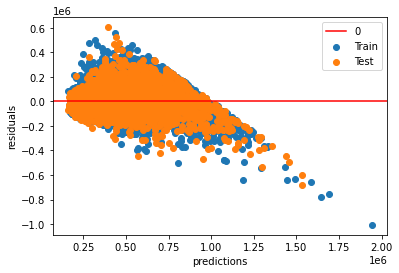

In [133]:
#Create a graph mapping out the test residuals agains the train residuals to view the relationship between the
#residuals versus the predictions

train_preds_4 = lr.predict(X_train_4)
train_residuals_4 = y_train_4 - np.exp(train_preds_4)
test_residuals_4 = y_test_4 - np.exp(y_pred_4)

plt.scatter(np.exp(train_preds_4), train_residuals_4, label='Train')
plt.scatter(np.exp(y_pred_4), test_residuals_4, label='Test')

plt.axhline(y = 0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

## 5) Begin Fifth Model

With the fifth model we will remove certain variables with goal of again, minimizing our error metrics. This model will again remove any variables with p-values above our alpha and in addition any insignificant coefficients. According to the below/the previous model, the variable with a p-value above our alpha is 'bedrooms'. In addition to variables with high p-values, we will remove any variables with relatively lower coefficients or have less of an impact on our target variable, 'price'.

### 5a) Drop Columns Based on P-Values and Coefficients

In [134]:
#Create a dictionary of all of the fourth model's variables and their corresponding p-values
fourth_model_pvalues = dict(fourth_model_OLS.pvalues)

#Create a new dictionary of just p-values that are greater than our alpha of 0.05
fourth_model_insignif_pvalues = {}
alpha = 0.05

for i in fourth_model_pvalues:
    if fourth_model_pvalues[i] > alpha:
        fourth_model_insignif_pvalues[i] = fourth_model_pvalues[i]
fourth_model_insignif_pvalues

{'bedrooms': 0.05627558774544627}

In [135]:
#Create a dictionary then a list of all of the fourth model's variables and their corresponding coefficients
#Be sure to sort the dictionary such that the variables with the lowest coefficients are at the top
fourth_model_coeffs = dict(fourth_model_OLS.params.abs())
sorted_values_2 = sorted(fourth_model_coeffs.values())
sorted_dict_2 = {}

for i in sorted_values_2:
    for k in fourth_model_coeffs.keys():
        if fourth_model_coeffs[k] == i:
            sorted_dict_2[k] = fourth_model_coeffs[k]

model_4_top_coeffs = list(sorted_dict_2.keys())

#Be sure to remove the 'cont' variable from our list
model_4_top_coeffs.remove('const')
model_4_top_coeffs[:5]

['grade', 'bedrooms', 'floors', 'condition', 'sqft_lot']

### 5b) Build Fifth Model 

Given the above, we will remove the above variables based on their low coefficients and high p-values, in addition to the variables that have been previously removed.

In [136]:
# Define X and y variables
X_5 = housing_data.drop(['price', 'sqft_basement', 'bedrooms', 'grade',
                        'floors', 'condition', 'sqft_lot'], 
                        axis = 1)

y_5 = housing_data['price']

# Train, test, split, here
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size = 0.33, random_state = 42)

# Separate Categorical (Ordinal vs. Nomial) vs. Numerical
# Numerical
X_train_numerical_5 = X_train_5.drop(['view', 'waterfront', 'zipcode'], axis = 1)
X_test_numerical_5 = X_test_5.drop(['view', 'waterfront', 'zipcode'], axis = 1)

# Scale the Categoricals
X_train_numerical_scaled_5 = scaler.fit_transform(X_train_numerical_5)
X_test_numerical_scaled_5 = scaler.transform(X_test_numerical_5)

# Turn into data frames
X_train_numerical_scaled_5 = pd.DataFrame(X_train_numerical_scaled_5,
                              columns=X_train_numerical_5.columns,
                              index=X_train_numerical_5.index)
X_test_numerical_scaled_5 = pd.DataFrame(X_test_numerical_scaled_5,
                             columns=X_test_numerical_5.columns,
                             index=X_test_numerical_5.index)

# Categorical - Ordinal
ordinal_columns_5 = ['view']
X_train_ordinal_5 = X_train_5[ordinal_columns_5]
X_test_ordinal_5 = X_test_5[ordinal_columns_5]
    
# One Hot Encoder
X_train_ordinal_5 = pd.DataFrame(
    ordinal.fit_transform(X_train_ordinal_5),
    columns = X_train_ordinal_5.columns,
    index = X_train_ordinal_5.index)

X_test_ordinal_5 = pd.DataFrame(
    ordinal.transform(X_test_ordinal_5),
    columns = X_test_ordinal_5.columns,
    index = X_test_ordinal_5.index)


# Categorical - Nominal
nominal_columns_5 = ['waterfront', 'zipcode']

X_train_nominal_5 = X_train_5[nominal_columns_5]
X_test_nominal_5 = X_test_5[nominal_columns_5]


# One Hot Encoder
X_train_nominal_5 = pd.DataFrame(
    one.fit_transform(X_train_nominal_5),
    columns = one.get_feature_names(nominal_columns_5),
    index = X_train_nominal_5.index)

X_train_nominal_5 = X_train_nominal_5.drop(['zipcode_98022', 'zipcode_98003', 'zipcode_98023', 
                                            'zipcode_98030', 'zipcode_98032', 'zipcode_98092',
                                           'zipcode_98042', 'zipcode_98168'], axis = 1)

X_test_nominal_5 = pd.DataFrame(
    one.transform(X_test_nominal_5),
    columns = one.get_feature_names(nominal_columns_5),
    index = X_test_nominal_5.index)

X_test_nominal_5 = X_test_nominal_5.drop(['zipcode_98022', 'zipcode_98003', 'zipcode_98023', 
                                            'zipcode_98030', 'zipcode_98032', 'zipcode_98092',
                                           'zipcode_98042', 'zipcode_98168'], axis = 1)

#Concat all trains/tests
X_train_5 = pd.concat([X_train_numerical_scaled_5, X_train_ordinal_5, X_train_nominal_5], axis=1)
X_test_5 = pd.concat([X_test_numerical_scaled_5, X_test_ordinal_5, X_test_nominal_5], axis=1)
                              

X_train_5.head()

bathrooms  sqft_living  sqft_above  yr_built  yr_renovated  \
3823    0.749950     1.097432    1.485798  1.133764      1.089317   
1292    3.351791     4.234892    4.754019  1.168024      1.124038   
14992   0.006566     1.181098    1.572950  0.585604      0.533779   
21168   0.749950    -0.757155   -0.780169  1.236544      1.193480   
14340  -1.480200    -0.938430   -0.634915 -0.853318     -0.924508   

       sqft_living15  view  waterfront_YES  zipcode_98002  zipcode_98004  ...  \
3823        0.728109   4.0             0.0            0.0            0.0  ...   
1292        2.941127   4.0             0.0            0.0            0.0  ...   
14992       1.550571   1.0             0.0            0.0            0.0  ...   
21168      -0.653968   4.0             0.0            0.0            0.0  ...   
14340       1.499697   1.0             0.0            0.0            0.0  ...   

       zipcode_98144  zipcode_98146  zipcode_98148  zipcode_98155  \
3823             0.0            0.0            0.0            0.0   
1292             0.0            0.0            0.0            0.0   
14992            0.0            0.0            0.0            0.0   
21168            0.0            0.0            0.0            0.0   
14340            0.0            0.0            0.0            0.0   

       zipcode_98166  zipcode_98177  zipcode_98178  zipcode_98188  \
3823             0.0            0.0            0.0            0.0   
1292             0.0            0.0            0.0            0.0   
14992            0.0            0.0            0.0            0.0   
21168            0.0            0.0            0.0            0.0   
14340            0.0            0.0            0.0            0.0   

       zipcode_98198  zipcode_98199  
3823             0.0            0.0  
1292             0.0            0.0  
14992            0.0            0.0  
21168            0.0            0.0  
14340            1.0            0.0  

[5 rows x 69 columns]

In [137]:
#Create the model using OLS
fifth_model_OLS = sm.OLS(endog=np.log(y_train_5), exog=sm.add_constant(X_train_5)).fit()
fifth_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     767.2
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:32:33   Log-Likelihood:                 3163.8
No. Observations:               12453   AIC:                            -6188.
Df Residuals:                   12383   BIC:                            -5668.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.6754      0.010   1324.937      0.000      12.657      12.694
bathrooms          0.0328      0.003     11.692      0.000       0.027       0.038
sqft_living        0.1405      0.004     34.783      0.000       0.133       0.148
sqft_above         0.0509      0.004     13.711      0.000       0.044       0.058
yr_built          -0.0428      0.005     -8.794      0.000      -0.052      -0.033
yr_renovated       0.0247      0.005      5.125      0.000       0.015       0.034
sqft_living15      0.0684      0.003     24.135      0.000       0.063       0.074
view              -0.0373      0.002    -16.762      0.000      -0.042      -0.033
waterfront_YES     0.4437      0.036     12.476      0.000       0.374       0.513
zipcode_98002     -0.0609      0.018     -3.479      0.001      -0.095      -0.027
zipcode_98004      1.0133      0.022     46.664      0.000       0.971       1.056
zipcode_98005      0.7607      0.022     34.307      0.000       0.717       0.804
zipcode_98006      0.6620      0.014     47.704      0.000       0.635       0.689
zipcode_98007      0.6453      0.023     27.545      0.000       0.599       0.691
zipcode_98008      0.6432      0.016     39.272      0.000       0.611       0.675
zipcode_98010      0.2650      0.023     11.628      0.000       0.220       0.310
zipcode_98011      0.4247      0.018     23.433      0.000       0.389       0.460
zipcode_98014      0.2976      0.021     14.404      0.000       0.257       0.338
zipcode_98019      0.2766      0.018     15.510      0.000       0.242       0.312
zipcode_98024      0.4075      0.028     14.496      0.000       0.352       0.463
zipcode_98027      0.5019      0.013     38.150      0.000       0.476       0.528
zipcode_98028      0.3839      0.014     26.963      0.000       0.356       0.412
zipcode_98029      0.5899      0.014     41.264      0.000       0.562       0.618
zipcode_98031      0.0568      0.016      3.581      0.000       0.026       0.088
zipcode_98033      0.7288      0.013     54.839      0.000       0.703       0.755
zipcode_98034      0.5118      0.011     44.913      0.000       0.489       0.534
zipcode_98038      0.1247      0.011     11.350      0.000       0.103       0.146
zipcode_98039      1.2908      0.084     15.303      0.000       1.125       1.456
zipcode_98040      0.8608      0.022     38.697      0.000       0.817       0.904
zipcode_98045      0.3270      0.016     20.309      0.000       0.295       0.359
zipcode_98052      0.6252      0.011     55.313      0.000       0.603       0.647
zipcode_98053      0.5652      0.013     43.386      0.000       0.540       0.591
zipcode_98055      0.0971      0.015      6.357      0.000       0.067       0.127
zipcode_98056      0.2957      0.012     23.878      0.000       0.271       0.320
zipcode_9805

### 5c) Error Handling

In [138]:
#Fit and score the baseline variables
lr.fit(X_train_5, np.log(y_train_5))
lr.score(X_train_5, np.log(y_train_5))

#Create a prediction variable
y_pred_5 = lr.predict(X_test_5)

#Un-log the prediction
y_pred_error_5 = np.exp(y_pred_5)

#Calculate the RMSE
model_5_RMSE = mean_squared_error(y_test_5, y_pred_error_5, squared = False)

#Calculate the MAE
model_5_MAE = mean_absolute_error(y_test_5, y_pred_error_5)

#Calculate the adjusted r-squared
model_5_rsquared_adj = fifth_model_OLS.rsquared_adj

print(f'''The fifth model's root mean squared error is ${round(model_5_RMSE, 2)}.''')
print(f'''The fifth model's mean absolute error is ${round(model_5_MAE, 2)}.''')
print(f'''The fifth model's adjusted r-squared is {round(model_5_rsquared_adj*100)}%.''')

print(f'''
The fourth model's root mean squared error was ${round(model_4_RMSE, 2)}.''')
print(f'''The fourth model's mean absolute error was ${round(model_4_MAE, 2)}.''')
print(f'''The fourth model's adjusted r-squared was {round(model_4_rsquared_adj*100)}%.''')

The fifth model's root mean squared error is $87750.54.
The fifth model's mean absolute error is $61875.67.
The fifth model's adjusted r-squared is 81.0%.

The fourth model's root mean squared error was $85746.37.
The fourth model's mean absolute error was $60274.08.
The fourth model's adjusted r-squared was 82.0%.


In [139]:
#Create a dictionary then a list of all of the fourth model's variables and their corresponding coefficients
#Be sure to sort the dictionary such that the variables with the lowest coefficients are at the top
fifth_model_coeffs = dict(fifth_model_OLS.params.abs())
sorted_values_3 = sorted(fifth_model_coeffs.values())
sorted_dict_3 = {}

for i in sorted_values_3:
    for k in fifth_model_coeffs.keys():
        if fifth_model_coeffs[k] == i:
            sorted_dict_3[k] = fifth_model_coeffs[k]

model_5_top_coeffs = list(sorted_dict_3.keys())

#Be sure to remove the 'cont' variable from our list
model_5_top_coeffs.remove('const')

Taking into consideration all five of the above models, it appears the third model would be best to utilize when predicting home prices. The third model utilized all of the data set's variables and treated 'zipcode' as a nominal variable through one hot encoding. As a result, the model reported the least amount of error with 85,626 USD of RMSE and 60,168 USD of MAE as well as the highest adjusted r-squared of 82.0%.

According to the fifth model, it appears that the variable with the highest coefficient or strongest relationship with the target variable 'price' is zip code 98039 (coefficient of 1.3). This likely means that the predictability in terms of property price in this zip code is particularly strong. After some initial google searching it appears as though this zip code encompasses a fair amount of the coast of Lake Washington and is proximate to Seattle, therefor properties tend to sell at higher prices.

Another interesting note regarding coefficients is that the top 34 coefficients according to the fifth model have the strongest relationship with the target variable, price. The variable with the highest coefficient that is not a zip code is 'waterfront_YES' (coefficient of 0.44). This intuitively makes sense as whether or not a property has direct access is a significant factor on a property's price, typically meaning that if the property is waterfront, it will typically be higher.

<AxesSubplot:xlabel='price'>

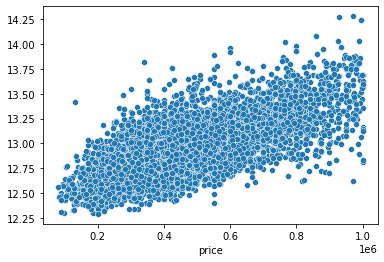

In [140]:
#Make into dataframe of residuals
sns.scatterplot(y = y_pred_2, x = y_test_2)

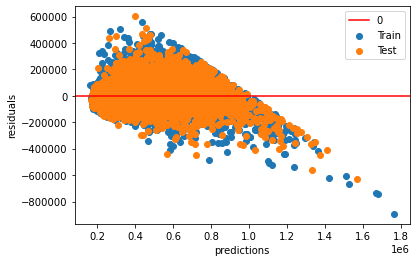

In [141]:
#Create a graph mapping out the test residuals agains the train residuals to view the relationship between the
#residuals versus the predictions

train_preds_5 = lr.predict(X_train_5)
train_residuals_5 = y_train_5 - np.exp(train_preds_5)
test_residuals_5 = y_test_5 - np.exp(y_pred_5)

plt.scatter(np.exp(train_preds_5), train_residuals_5, label='Train')
plt.scatter(np.exp(y_pred_5), test_residuals_5, label='Test')

plt.axhline(y = 0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

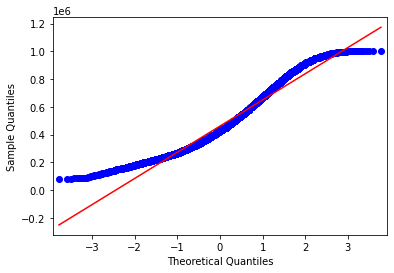

In [142]:
#Map the model's residuals against a regression line
train_residuals_5 = y_train_5 - lr.predict(X_train_5)
sm.qqplot(train_residuals_5, line = 'r');

<AxesSubplot:xlabel='price'>

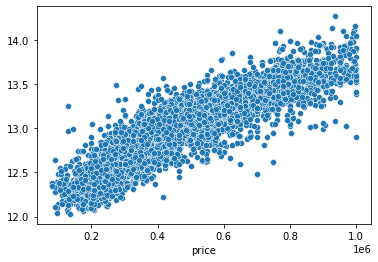

In [143]:
#Compare prediction vs. test
sns.scatterplot(y = y_pred_5, x = y_test_5)

# Conclusions


This analysis leads to three recommended zip codes the stakeholder should consider purchasing their vacation home in:

- **ZIP Code 98070:** Given the properties within the requirements and budget of the stakeholder are typically older (either renovated or built between 1950 – 1980) it is recommended the stakeholder target homes that fall in the middle of their 1.0 million budget. With the average selling price in the 98070 ZIP code being 555k USD, there will be plenty of leftover funds for the stakeholder to invest in any upgrades to their home. ZIP code 98070 is located on Vashon Island which known for its waterfront homes and therefor is ideal for a vacation home.

-  **ZIP Code 98198:** In the event the stakeholder does not want a home on Vashon Island, ZIP code 98198 also reports average home prices well below their budget of 1 million USD at average sale prices of 468k USD. This allows for enough funds for the stakeholder to invest in any improvements the average year built for waterfront homes in this ZIP code is 1968.
- **ZIP Code 98178:** Similar to ZIP codes 98070 and 98198, ZIP code 98178 reports an average home sales price of 450k USD and an average year built or renovated of 1953. This ZIP code offers the least amount of waterfront homes in terms of volume but is the most proximate to Seattle.

## Next Steps

Further criteria and analyses could yield additional insights to further inform the stakeholder in terms of where to purchase their vacation home:

- **Consider non-waterfront homes.** The stakeholder should consider whether or not a waterfront home is absolutely necessary for their vacation home. With more time, including  homes that are not waterfront but still proximate to water may increase home options substantially and as a result allow for other locations and/or newer properties to be considered. 
- **Specify ideal square footage.** Based on the regression models preformed throughout this notebook, it is clear that the square footage has a significant relationship with a property’s price. If the stakeholder would provide parameters regarding their ideal home square footage an estimate on average price would be more accurate.
- **Utilize more recent sales data.** The analyses and recommendations presented throughout this notebook are based off of the King County data set. The data set only contains homes that were sold between 2014 and 2015. Given the ever-changing nature of the real estate industry, especially after COVID-19, it would be helpful with more time to review a data set that contains more recent sales.